# <font color=#005656><div align="center"> Sales analysis

### Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Juntar todas las tablas disponibles en una sola

In [2]:
mainpath = r"C:\Users\Carlos\OneDrive\Formación\Python\Casos de análisis\Caso 1\SalesAnalysis\Sales_Data"
# Almacenar el nombre de cada archivo según una dirección
files = [file for file in os.listdir(mainpath)]

# Declaración de un Dataframe vacío
all_months_data = pd.DataFrame()

# Carga de todos los archivos en un dirección específica
for file in files:
    df = pd.read_csv(os.path.join(mainpath,file))
    df.insert(loc=len(df.columns),
              column='File_origin',
             value=file)
    all_months_data = pd.concat([all_months_data,df])

# Creación de un nuevo archivo csv con los datos combinados
all_months_data.to_csv("all_data.csv",index = False)

### Importar el archivo generado

In [3]:
all_data = pd.read_csv("all_data.csv")
print(all_data.info())
print('-------------------------------- \n')
print(all_data.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   File_origin       186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB
None
-------------------------------- 

True


### Lipieza del dataset

In [4]:
# Eliminar las filas vacías en todas sus variables
# Considerar que el método "drop.na" no modifica el dataset original
all_data = all_data.dropna(subset=all_data.columns.values.tolist()[:-1])
print(all_data.info())
print('-------------------------------- \n')
print(all_data.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   File_origin       186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB
None
-------------------------------- 

False


In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv


Se detectó que existen campos con valores no numéricos

In [6]:
all_data["Quantity Ordered"].unique().tolist()

['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9']

In [7]:
# Los archivos tienen filas copiadas
# El método .loc no modifica el dataset original
all_data.loc[(all_data["Quantity Ordered"] == "Quantity Ordered")].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_April_2019.csv
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_April_2019.csv
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_April_2019.csv
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_April_2019.csv
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_April_2019.csv


In [8]:
all_data = all_data.loc[(all_data["Quantity Ordered"] != "Quantity Ordered")]
print(all_data.info())
print('-------------------------------- \n')
print(all_data.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   File_origin       185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB
None
-------------------------------- 

False


In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv


### Pregunta 1: ¿Qué mes tuvo las ventas más altas? ¿Cuánto se ganó en dicho periodo?

#### Adición de nuevas columnas

In [10]:
all_data['Month'] = all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04


#### Cambio del tipo de variables

In [11]:
#all_data["Month"] = all_data["Month"].astype('int32')

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
File_origin         object
Month               object
dtype: object

In [13]:
convert_dic = {"Order ID": "int32","Product": str,"Quantity Ordered": int,
               "Price Each": float,"Order Date": str,"Purchase Address": str,
               "File_origin": str}
all_data = all_data.astype(convert_dic)
print(all_data.dtypes)

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
File_origin          object
Month                object
dtype: object


#### Adición de la columna de ventas

In [14]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99


#### Respuesta a la pregunta

In [15]:
# Diciembre fue el mes con las mejores ventas
results = all_data.groupby("Month").sum()[["Quantity Ordered","Sales"]]
results

,Quantity Ordered,Sales
Month,,
01,10903,1822256.73
02,13449,2202022.42
03,17005,2807100.38
04,20558,3390670.24
05,18667,3152606.75
06,15253,2577802.26
07,16072,2647775.76
08,13448,2244467.88
09,13109,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

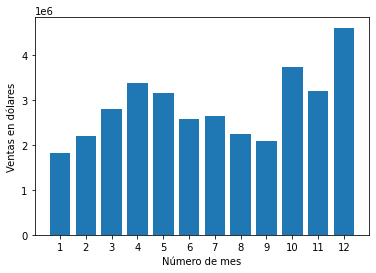

In [16]:
months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Ventas en dólares")
plt.xlabel("Número de mes")
plt.show

### ¿Qué ciudad tuvo las ventas más altas? ¿Cuánto se ganó en dicho periodo?

#### Separar columnas

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99


In [18]:
# split column and add new columns to df
all_data2 = all_data.copy()
all_data2[['Address', 'City', 'Code']] = all_data2['Purchase Address'].str.split(',', expand=True)
all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,Address,City,Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,333 8th St,Los Angeles,CA 90001


In [19]:
results2 = all_data2.groupby("City").sum()[["Quantity Ordered","Sales"]]
results2

,Quantity Ordered,Sales
City,,
Atlanta,16602,2795498.58
Austin,11153,1819581.75
Boston,22528,3661642.01
Dallas,16730,2767975.40
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Portland,14053,2320490.61
San Francisco,50239,8262203.91
Seattle,16553,2747755.48


Es posible aislar solamente la columna de interés

In [20]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles


Considerar que los nombre de las ciudades pueden estar duplicados si no se extrae el estado

In [21]:
results3 = all_data.groupby("City").sum()[["Quantity Ordered","Sales"]]
results3

,Quantity Ordered,Sales
City,,
Atlanta,16602,2795498.58
Austin,11153,1819581.75
Boston,22528,3661642.01
Dallas,16730,2767975.40
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Portland,14053,2320490.61
San Francisco,50239,8262203.91
Seattle,16553,2747755.48


El método apply funcionará bien en tanto no se traten excesivas cantidades de datos

In [22]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)


In [23]:
results4 = all_data.groupby("City").sum()[["Quantity Ordered","Sales"]]
results4

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


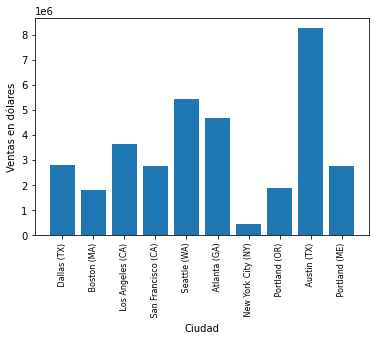

In [24]:
# Este gráfico está errado por el orden de los ejes y las cantidades
cities = all_data["City"].unique()
plt.bar(cities,results4["Sales"])
plt.xticks(cities, rotation = "vertical",size =8)
plt.ylabel("Ventas en dólares")
plt.xlabel("Ciudad")
plt.show()

Como científicos de datos debemos preguntarnos por qué San Francisco tinen las ventas más altas... <br/>
Pueden formularse varias hipótesis que viene de una segmentación de mercado: nivel de ingresos, ubicación, edad, etc.

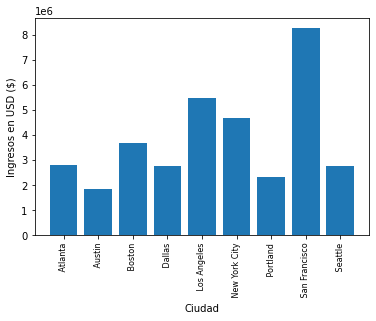

In [25]:
keys = [city for city, df in all_data2.groupby(['City'])]
plt.bar(keys,all_data2.groupby(['City']).sum()['Sales'])
plt.ylabel('Ingresos en USD ($)')
plt.xlabel('Ciudad')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### ¿Cuál es el mejor momento para desplegar avisos publicitarios de manera que se maximice la probabilidad de que un cliente pueda comprar un producto?

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)


In [27]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA)


In [30]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),9,27


In [36]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),9,27,1


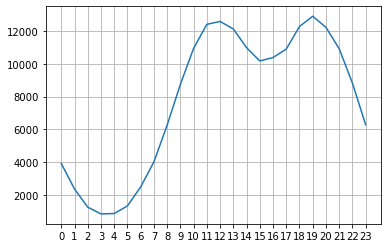

In [39]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

### ¿Qué productos se venden juntos usualmente?

In [40]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),9,27,1


In [47]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_1800\1224629595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [58]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### ¿Qué producto vendió más? ¿Por qué fue así?

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,File_origin,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv,04,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv,04,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv,04,11.99,Los Angeles (CA),9,27,1


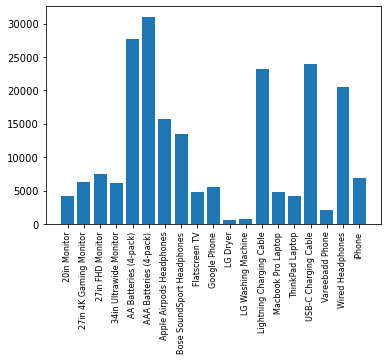

In [74]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [77]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Carlos\AppData\Local\Temp\ipykernel_1800\136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_1800\136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


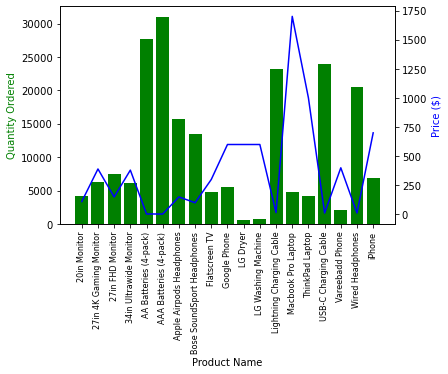

In [78]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()